In [1]:
import numpy as np

import matplotlib.pyplot as plt

from utils import *

In [75]:
N = 36**2

T = 0
kB = 1

mu = 0.1

delta0 = generate_initial_order_parameter(N) 
delta = np.copy(delta0)

H = get_hamiltonian(N, mu=mu)
bdg_H = get_bdg_hamiltonian(H, delta)

for i in range(100):
    last_delta = delta
    energy_array, eigen_vectors = np.linalg.eig(bdg_H)
    delta = update_delta(N, delta, energy_array, eigen_vectors, T=T)
    print("Diff: ", np.abs(delta - last_delta))
    bdg_H = get_bdg_hamiltonian(H, delta)

print(np.max(np.real(delta)))
print(np.max(np.imag(delta)))

/home/axel/bdg_formalism/BdG-numerical/utils.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / (np.exp(np.real(E)/(kB*T)) + 1)


Diff:  [[0.         0.03825269 0.05036586 ... 0.01832283 0.02631513 0.04092812]
 [0.03825269 0.         0.01818345 ... 0.04383162 0.01555078 0.03273454]
 [0.05036586 0.01818345 0.         ... 0.0393501  0.01909068 0.03079598]
 ...
 [0.01832283 0.04383162 0.0393501  ... 0.         0.02385629 0.03458246]
 [0.02631513 0.01555078 0.01909068 ... 0.02385629 0.         0.03401106]
 [0.04092812 0.03273454 0.03079598 ... 0.03458246 0.03401106 0.        ]]
Diff:  [[0.         0.03347753 0.06242354 ... 0.03530512 0.0349387  0.0361731 ]
 [0.03347753 0.         0.02792604 ... 0.05089504 0.03467657 0.02603852]
 [0.06242354 0.02792604 0.         ... 0.02889254 0.02773774 0.0673803 ]
 ...
 [0.03530512 0.05089504 0.02889254 ... 0.         0.02198417 0.05074734]
 [0.0349387  0.03467657 0.02773774 ... 0.02198417 0.         0.03666047]
 [0.0361731  0.02603852 0.0673803  ... 0.05074734 0.03666047 0.        ]]
Diff:  [[0.         0.0382974  0.06367367 ... 0.04080964 0.04771162 0.02855161]
 [0.0382974  0.   

0.13410006494991175


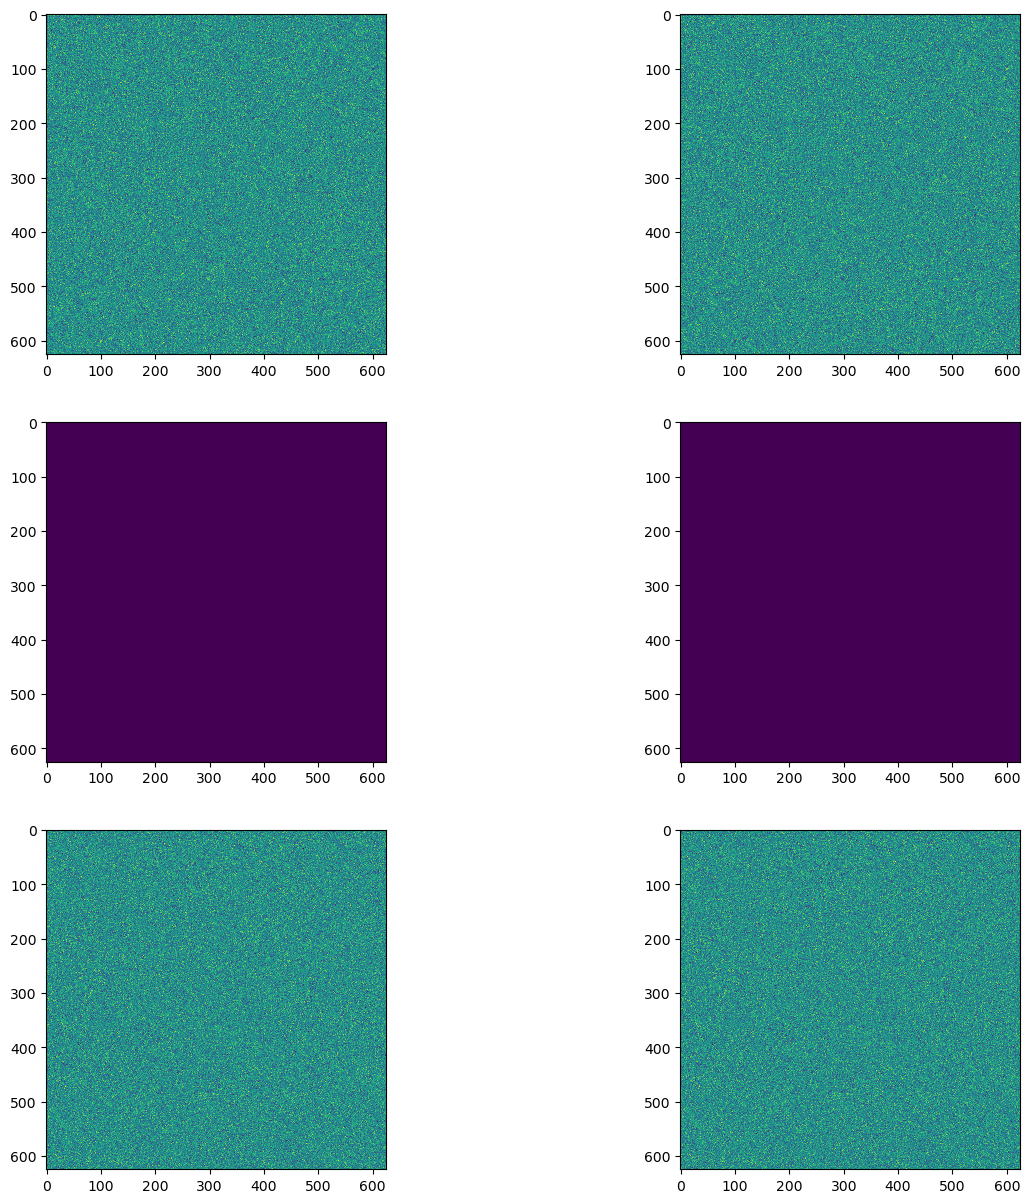

In [54]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0,0].imshow(np.imag(delta).T, interpolation='none')
axs[0,1].imshow(np.imag(delta), interpolation='none')
axs[1,0].imshow(np.imag(delta)+np.imag(delta).T, interpolation='none')

axs[1,1].imshow(np.real(delta)+np.real(delta).T, interpolation='none')
axs[2,0].imshow(np.real(delta), interpolation='none')
axs[2,1].imshow(np.real(delta), interpolation='none')

print(np.max(np.real(delta)))

plt.show()

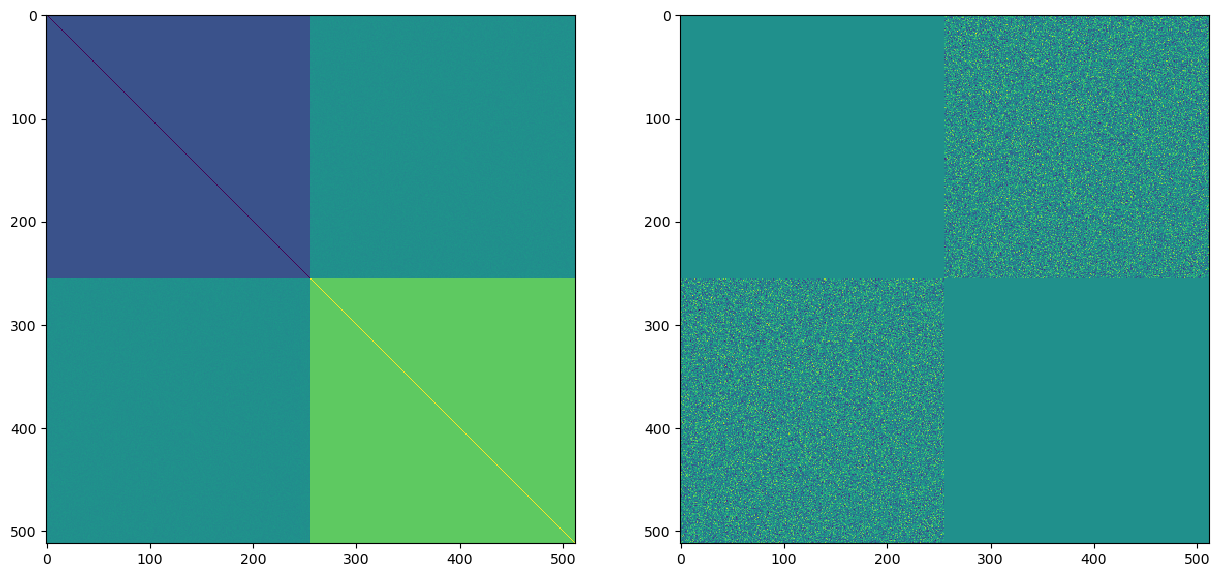

In [32]:
fig, axs = plt.subplots(1, 2,  figsize=(15, 15))

axs[0].imshow(np.real(bdg_H), interpolation='none')
axs[1].imshow(np.imag(bdg_H), interpolation='none')

plt.show()

In [76]:
# Calculating wave symmetries

def out_of_bounds(i, N):
    n = int(np.sqrt(N))

    # If outisde boundary
    if (i < n) or (N-n-1 <= i <= N) or (i%n == 0) or ( i%n == n-1):
        return True

n = int(np.sqrt(N))
sites_shape = (int(np.sqrt(n)), int(np.sqrt(n)))

delta_px = np.zeros(sites_shape, dtype='complex128').flatten()
delta_py = np.zeros(sites_shape, dtype='complex128').flatten()
delta_flat = delta.flatten()

for i in range(n):
    if out_of_bounds(i, n):
        continue
    delta_px[i] = (delta[i+1, i] - delta[i-1, i]) / 2
    delta_py[i] = (delta[i,i+n] - delta[i, i-n]) / 2
        
delta_p = delta_px + 1j*delta_py
delta_m = delta_px - 1j*delta_py

delta_p = delta_p.reshape(sites_shape)
delta_m = delta_m.reshape(sites_shape)

min/max abs for p 0.0 0.12882936878354206
min/max abs for m 0.0 0.13276808209350793


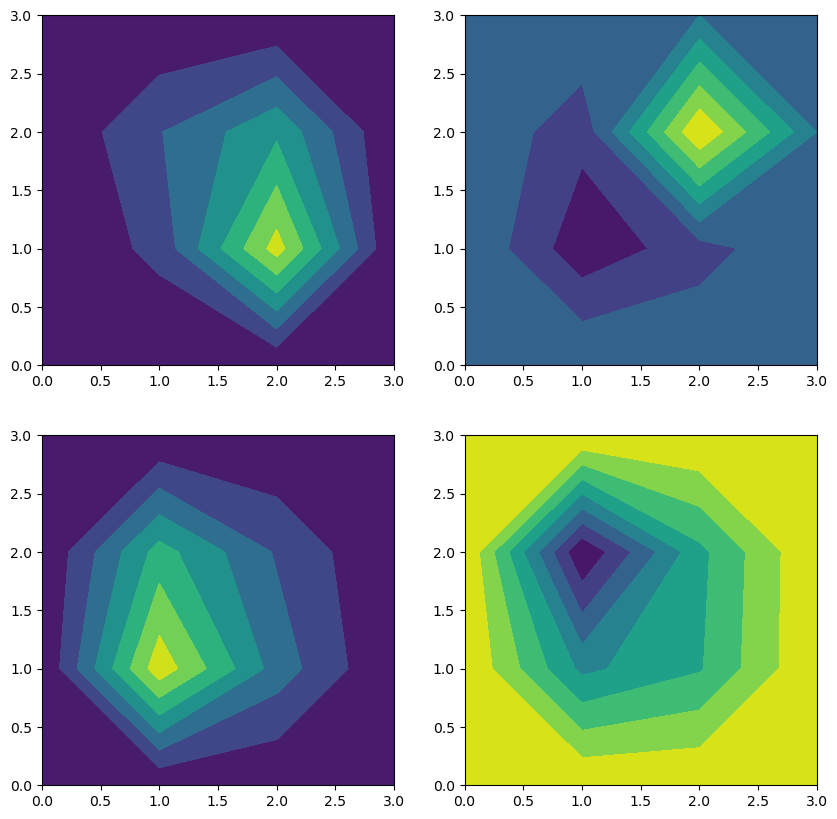

In [77]:
fig, axs = plt.subplots(2, 2,  figsize=(10, 10))

# axs[0].imshow(np.abs(delta_p), interpolation='none')
# axs[1].imshow(np.angle(delta_p), interpolation='none')

axs[0,0].contourf(np.abs(delta_p))
axs[0,1].contourf(np.angle(delta_p))

axs[1,0].contourf(np.abs(delta_m))
axs[1,1].contourf(np.angle(delta_m))


print("min/max abs for p", np.min(np.abs(delta_p)), np.max(np.abs(delta_p)))
print("min/max abs for m", np.min(np.abs(delta_m)), np.max(np.abs(delta_m)))

plt.show()

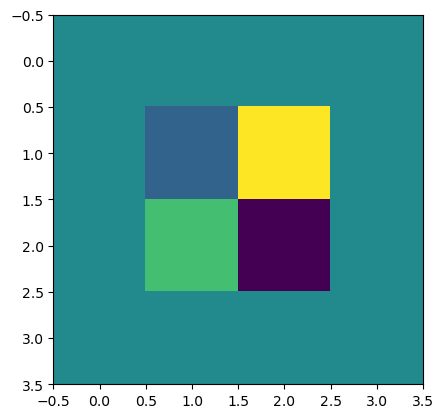

In [73]:
plt.imshow(np.angle(delta_p), interpolation='none')
plt.imshow(np.angle(delta_m), interpolation='none')